# Stock Market Analysis And Forecasting with GRU Time Series

In this project, we will analyze the data and forecast the stock market based on the data

## EDA

In [80]:
import numpy as np  # Importing numpy library for numerical computations
import pandas as pd  # Importing pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib library for creating static plots
import seaborn as sns  # Importing seaborn library for enhanced statistical visualizations
import plotly.express as px  # Importing plotly express library for interactive visualizations and plots

In [81]:
google = pd.read_csv('google.csv', index_col='Date', parse_dates=['Date'])
google.head()

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

In [82]:
microsoft = pd.read_csv('microsoft.csv', index_col='Date', parse_dates=['Date'])
microsoft.head()

Open   High    Low  Close     Volume  Name
Date                                                   
2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT

In [83]:
amazon = pd.read_csv('amazon.csv', index_col='Date', parse_dates=['Date'])
amazon.head()

Open   High    Low  Close   Volume  Name
Date                                                 
2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN

In [84]:
ibm = pd.read_csv('ibm.csv', index_col='Date', parse_dates=['Date'])
ibm.head()

Open   High    Low  Close    Volume Name
Date                                                 
2006-01-03  82.45  82.55  80.81  82.06  11715200  IBM
2006-01-04  82.20  82.50  81.33  81.95   9840600  IBM
2006-01-05  81.40  82.90  81.00  82.50   7213500  IBM
2006-01-06  83.95  85.03  83.41  84.95   8197400  IBM
2006-01-09  84.10  84.25  83.38  83.73   6858200  IBM

In [85]:
google.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    428.200802   431.835618   424.130275   428.044001  3.551504e+06
std     236.320026   237.514087   234.923747   236.343238  3.038599e+06
min     131.390000   134.820000   123.770000   128.850000  5.211410e+05
25%     247.775000   250.190000   244.035000   247.605000  1.760854e+06
50%     310.480000   312.810000   307.790000   310.080000  2.517630e+06
75%     572.140000   575.975000   565.900000   570.770000  4.242182e+06
max    1083.020000  1086.490000  1072.270000  1085.090000  4.118289e+07

In [86]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [87]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [88]:
google.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [89]:
microsoft.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     36.496817    36.827903    36.173190    36.513412  5.161762e+07
std      14.683337    14.742483    14.620057    14.694656  3.114958e+07
min      15.200000    15.620000    14.870000    15.150000  7.425603e+06
25%      26.785000    27.045000    26.535000    26.835000  3.136557e+07
50%      29.990000    30.230000    29.780000    30.000000  4.617529e+07
75%      44.545000    44.980000    44.090000    44.400000  6.322291e+07
max      87.120000    87.500000    86.230000    86.850000  5.910786e+08

In [13]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [14]:
microsoft.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [15]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [16]:
amazon.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    299.335310   302.371163   296.037695   299.376231  5.931712e+06
std     280.120547   281.826442   277.927134   279.980161  5.122034e+06
min      26.090000    26.300000    25.760000    26.070000  9.864350e+05
25%      81.175000    82.580000    79.725000    81.090000  3.137037e+06
50%     205.330000   208.000000   202.100000   205.440000  4.724100e+06
75%     375.570000   379.155000   373.000000   375.140000  7.135246e+06
max    1204.880000  1213.410000  1191.150000  1195.830000  1.044046e+08

In [17]:
amazon.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [18]:
amazon.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [19]:
ibm.describe()

Open         High          Low        Close        Volume
count  3019.000000  3020.000000  3019.000000  3020.000000  3.020000e+03
mean    145.515545   146.681738   144.471597   145.617278  5.773301e+06
std      37.554946    37.613446    37.477641    37.529387  3.192831e+06
min      72.740000    73.940000    69.500000    71.740000  2.542560e+05
25%     116.405000   117.765000   115.490000   116.525000  3.622681e+06
50%     149.610000   150.330000   148.470000   149.315000  4.928852e+06
75%     178.445000   179.762500   177.330000   178.685000  6.965014e+06
max     215.380000   215.900000   214.300000   215.800000  3.077428e+07

In [20]:
ibm.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [90]:
ibm.isna().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [91]:
ibm.dropna(inplace=True)

In [92]:
ibm.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

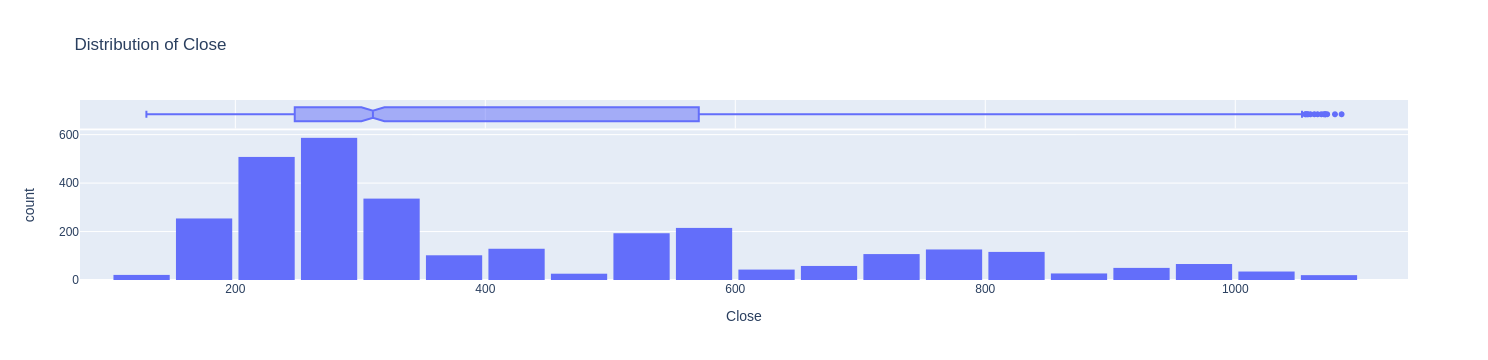

In [93]:
fig = px.histogram(google, 
                   x='Close', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Close')

fig.update_layout(bargap=0.1)

# Display the histogram plot
fig.show()

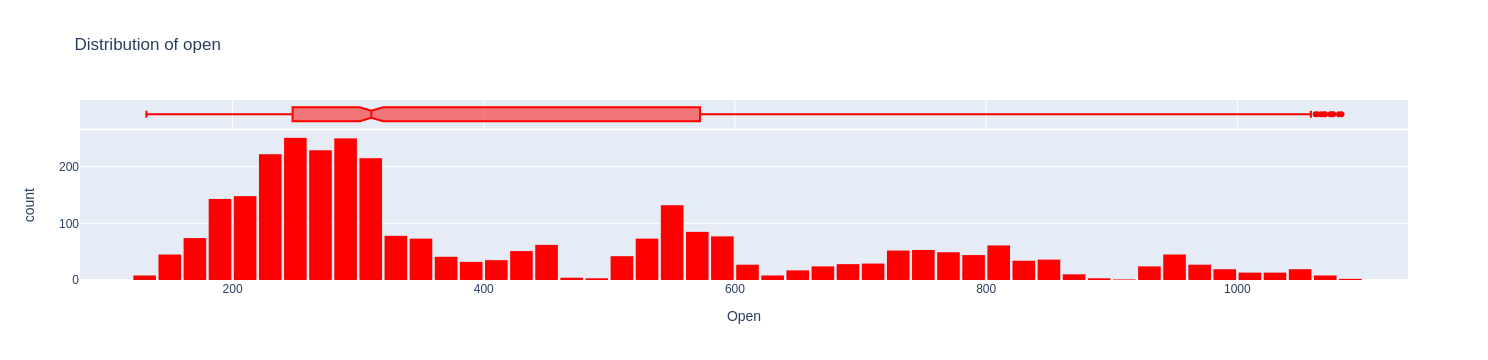

In [25]:
fig = px.histogram(google, 
                   x='Open', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of open')
fig.update_layout(bargap=0.1)

# Display the histogram plot
fig.show()

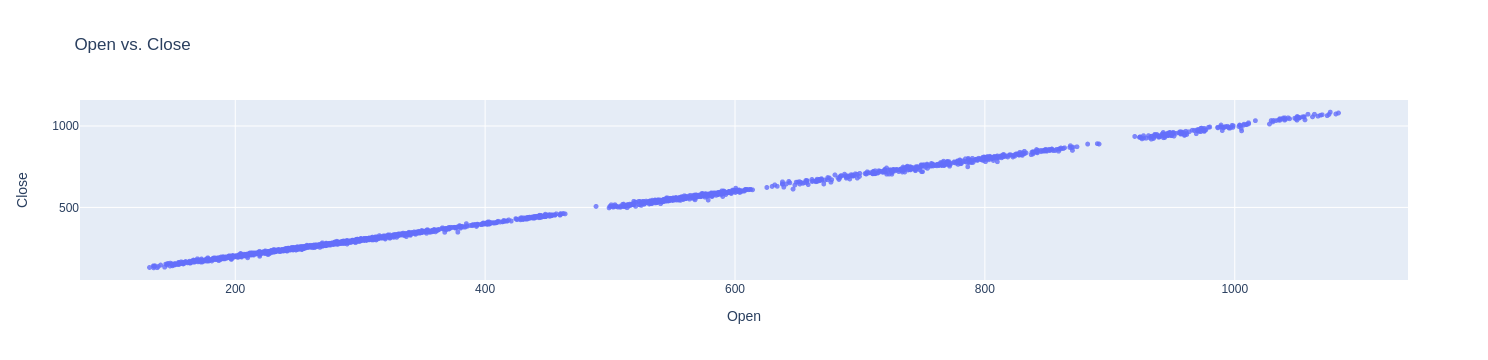

In [26]:
fig = px.scatter(google, 
                 x='Open', 
                 y='Close', 
                 
                 opacity=0.8, 
                  
                 title='Open vs. Close')
fig.update_traces(marker_size=5)

# Display the scatter plot
fig.show()

In [27]:
google.corr()

Open      High       Low     Close    Volume
Open    1.000000  0.999894  0.999841  0.999742 -0.443155
High    0.999894  1.000000  0.999827  0.999866 -0.440717
Low     0.999841  0.999827  1.000000  0.999896 -0.447781
Close   0.999742  0.999866  0.999896  1.000000 -0.444590
Volume -0.443155 -0.440717 -0.447781 -0.444590  1.000000

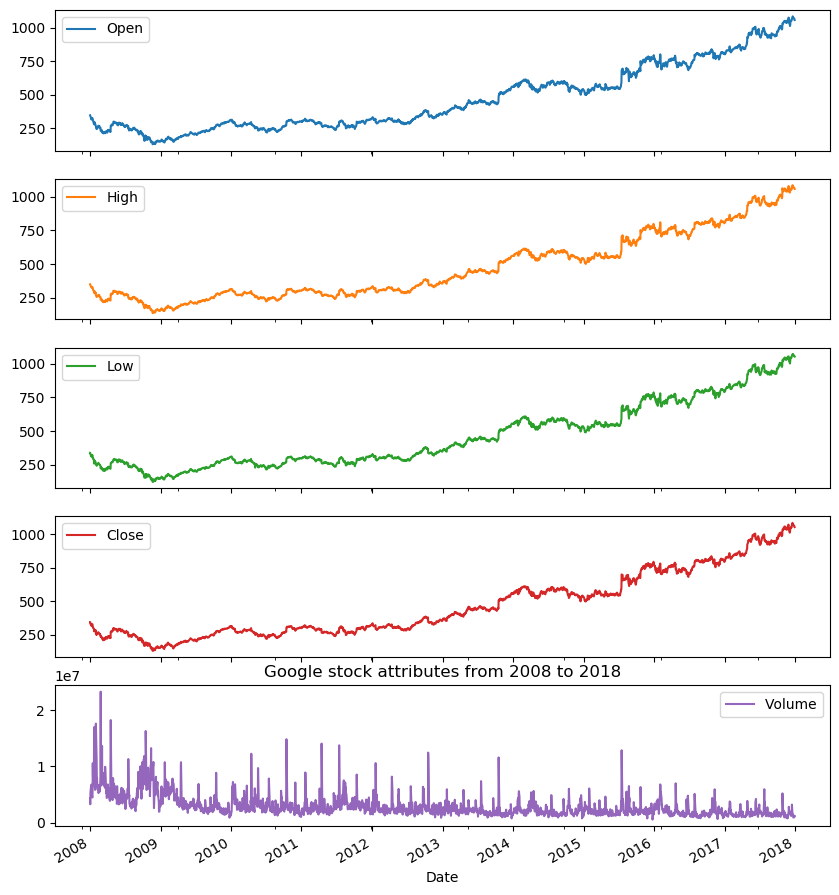

In [28]:
google['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

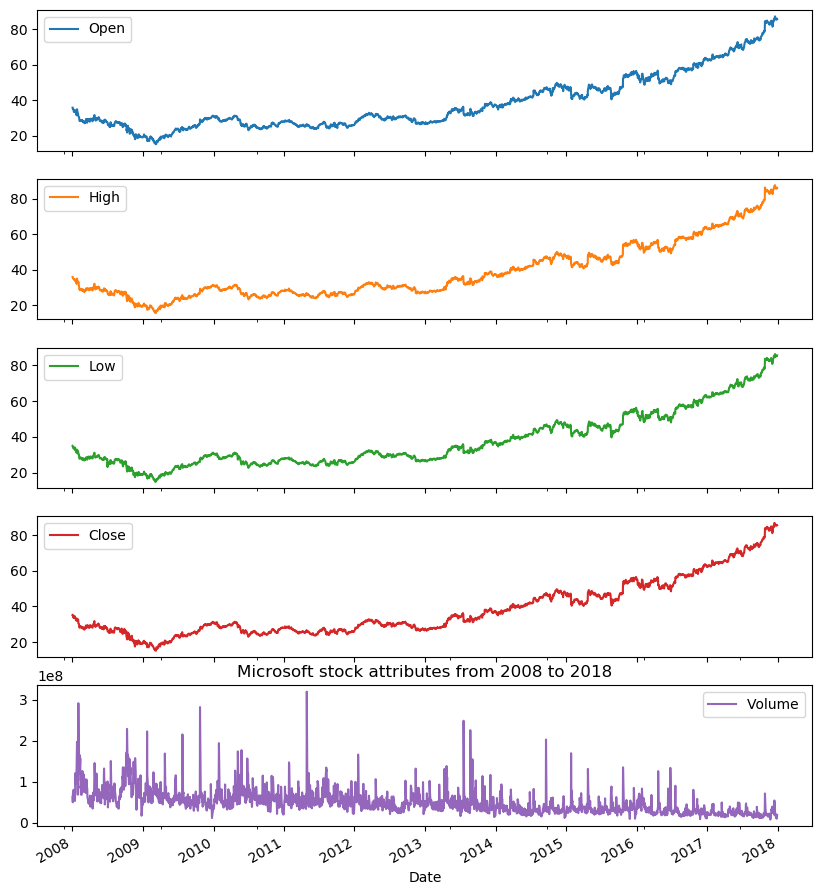

In [29]:
microsoft['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Microsoft stock attributes from 2008 to 2018')
plt.show()

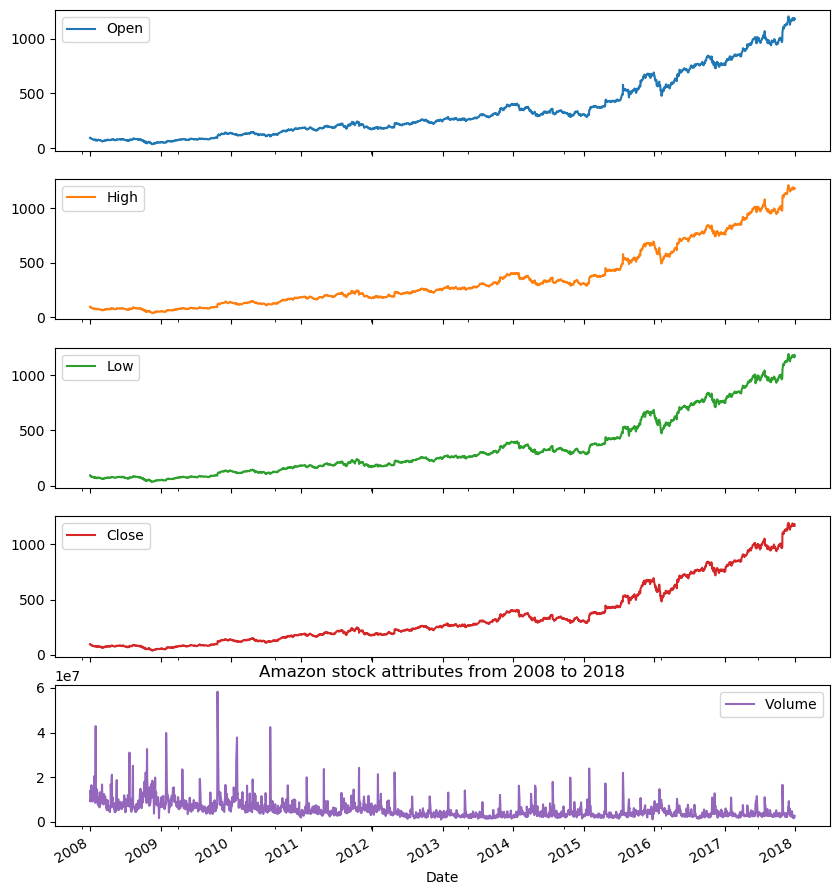

In [30]:
amazon['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes from 2008 to 2018')
plt.show()

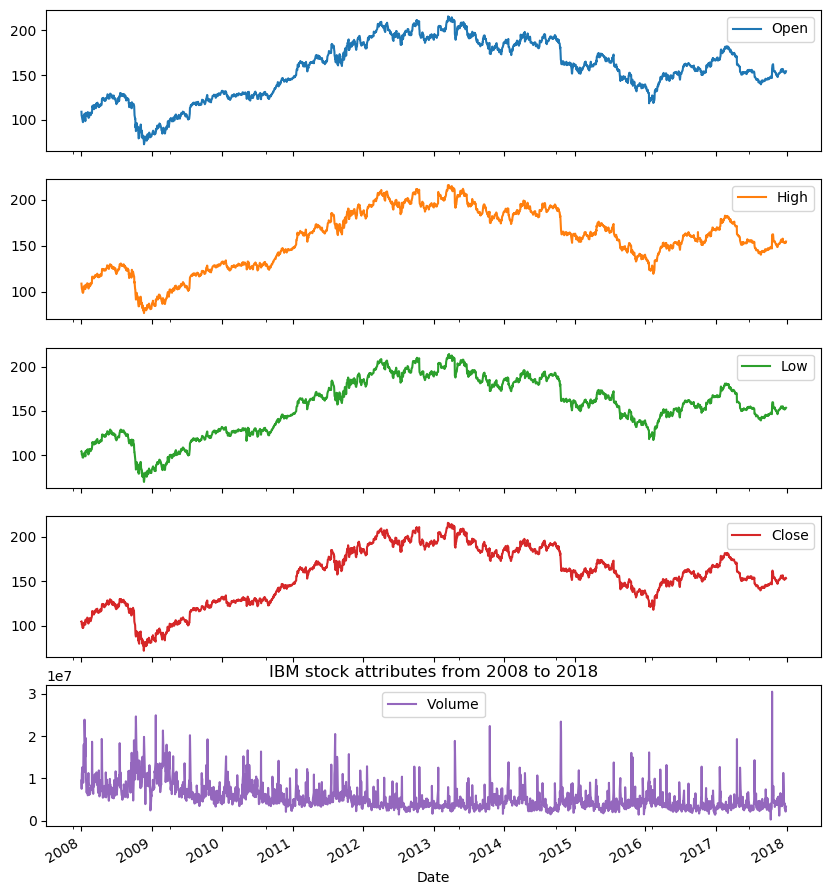

In [31]:
ibm['2008':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('IBM stock attributes from 2008 to 2018')
plt.show()

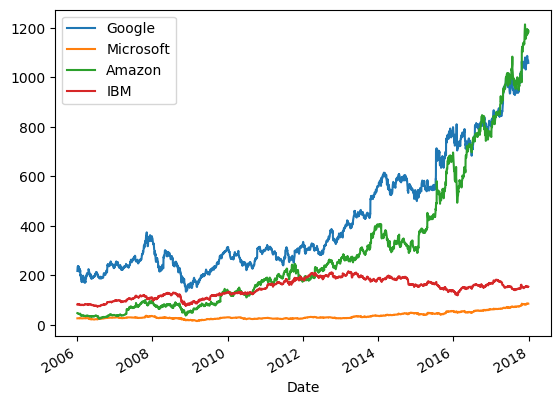

In [34]:
google.High.plot()
microsoft.High.plot()
amazon.High.plot()
ibm.High.plot()
plt.legend(['Google','Microsoft','Amazon','IBM'])
plt.show()

### Expanding Window

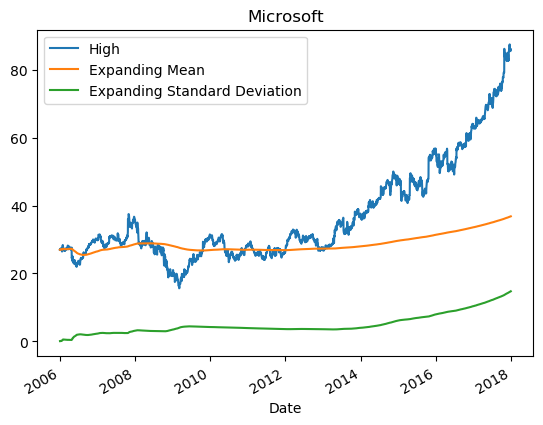

In [35]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Microsoft')
plt.show()

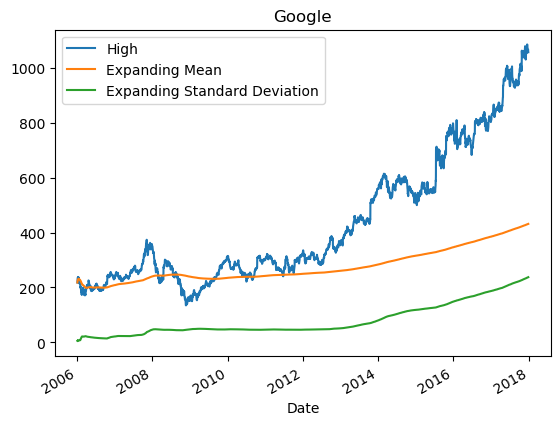

In [36]:
# Expanding window functions
google_mean = google.High.expanding().mean()
google_std = google.High.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

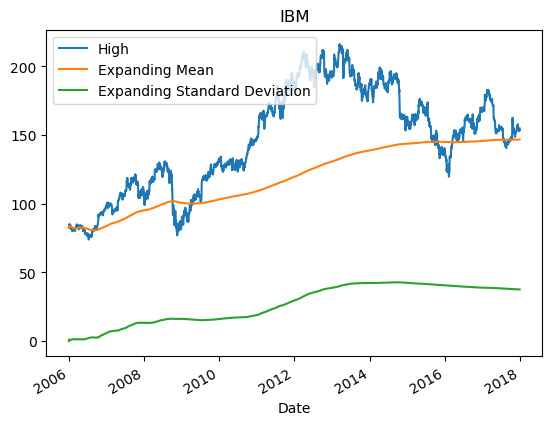

In [37]:
# Expanding window functions
ibm_mean = ibm.High.expanding().mean()
ibm_std = ibm.High.expanding().std()
ibm.High.plot()
ibm_mean.plot()
ibm_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('IBM')
plt.show()

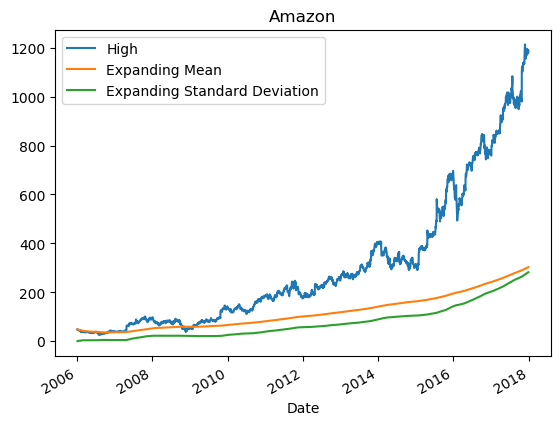

In [38]:
# Expanding window functions
amazon_mean = amazon.High.expanding().mean()
amazon_std = amazon.High.expanding().std()
amazon.High.plot()
amazon_mean.plot()
amazon_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Amazon')
plt.show()

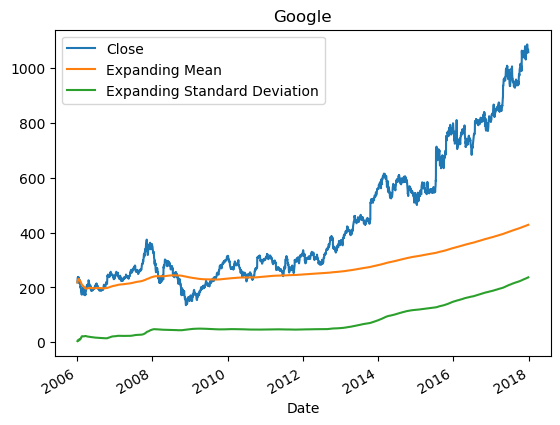

In [39]:
# Expanding window functions
google_mean = google.Close.expanding().mean()
google_std = google.Close.expanding().std()
google.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

In [40]:
from pylab import rcParams
import statsmodels.api as sm

### Trend and Seasonality (High)

#### Google

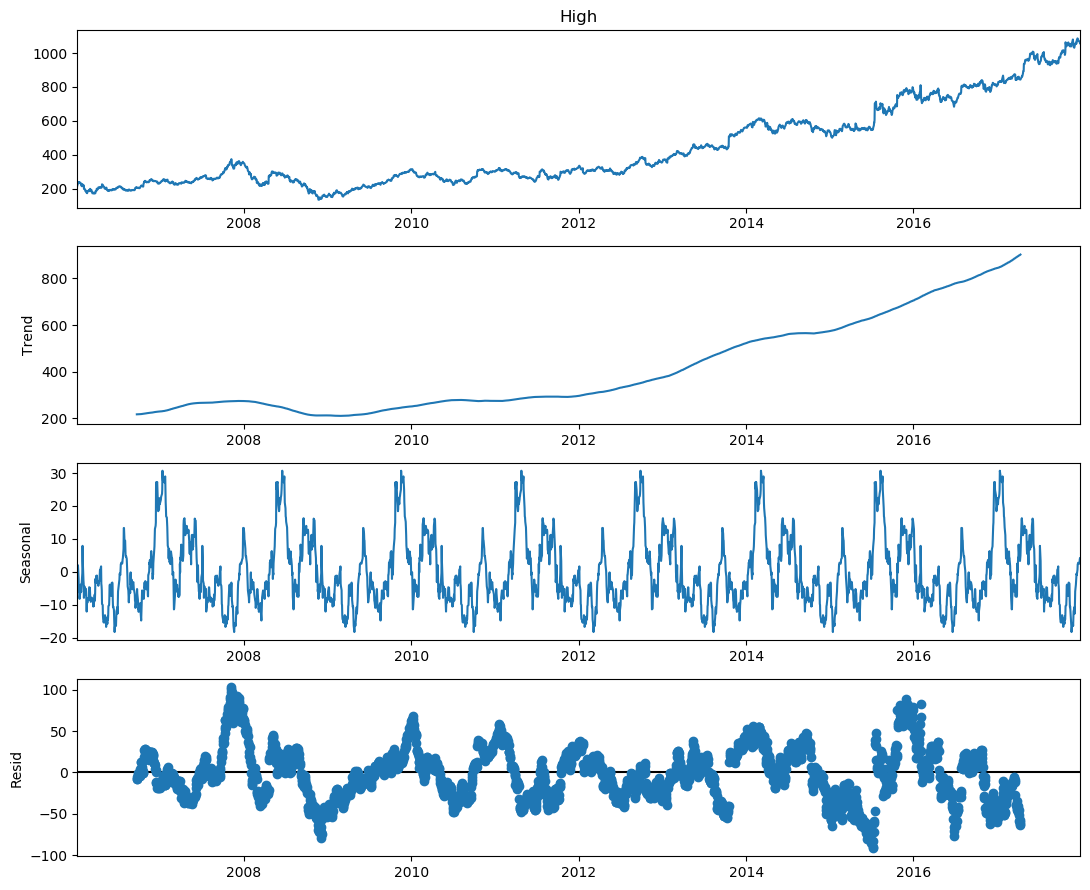

In [42]:
# Set the figure size
rcParams['figure.figsize'] = 11, 9

# Perform seasonal decomposition on the "High" column of the "google" DataFrame
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"], period=360)  # The frequency is annual

# Plot the decomposition results
figure = decomposed_google_volume.plot()

# Display the plot
plt.show()

#### Microsoft

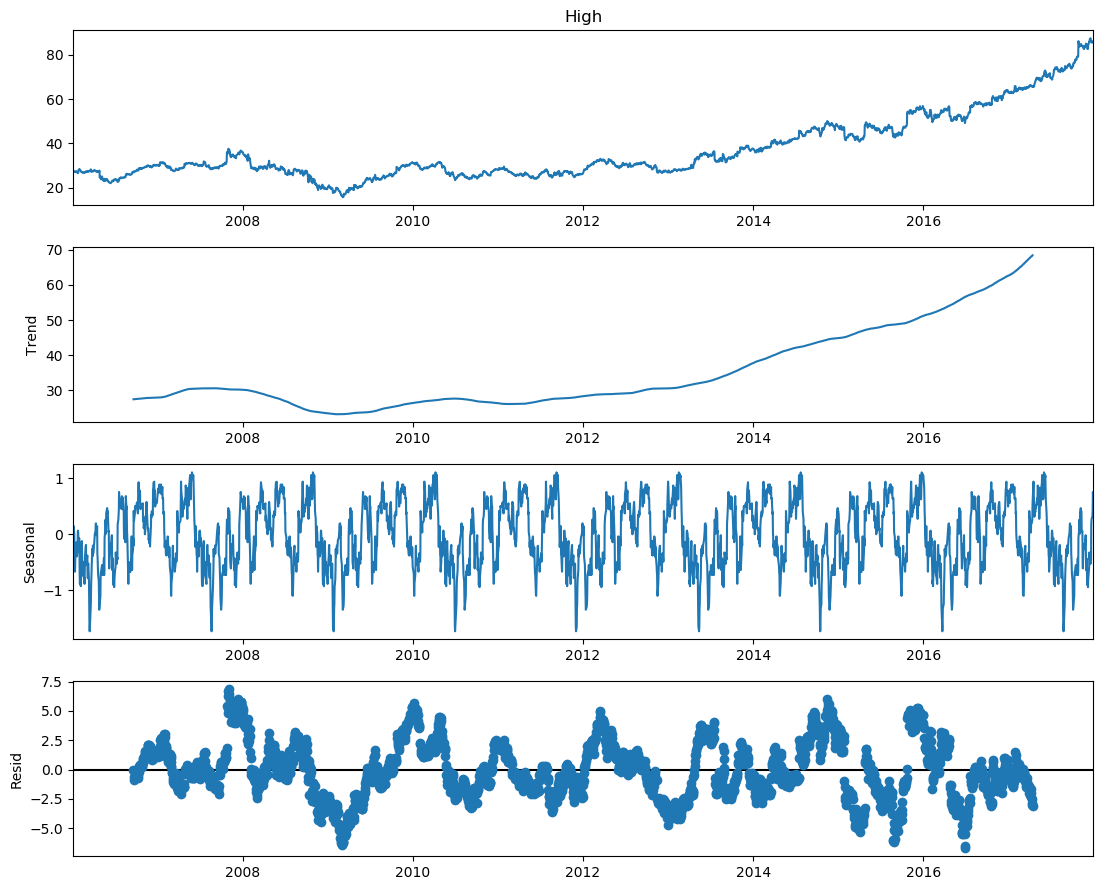

In [43]:
# Set the figure size
rcParams['figure.figsize'] = 11, 9

# Perform seasonal decomposition on the "High" column of the "microsoft" DataFrame
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["High"], period=360)  # The frequency is annual

# Plot the decomposition results
figure = decomposed_microsoft_volume.plot()

# Display the plot
plt.show()

#### IBM

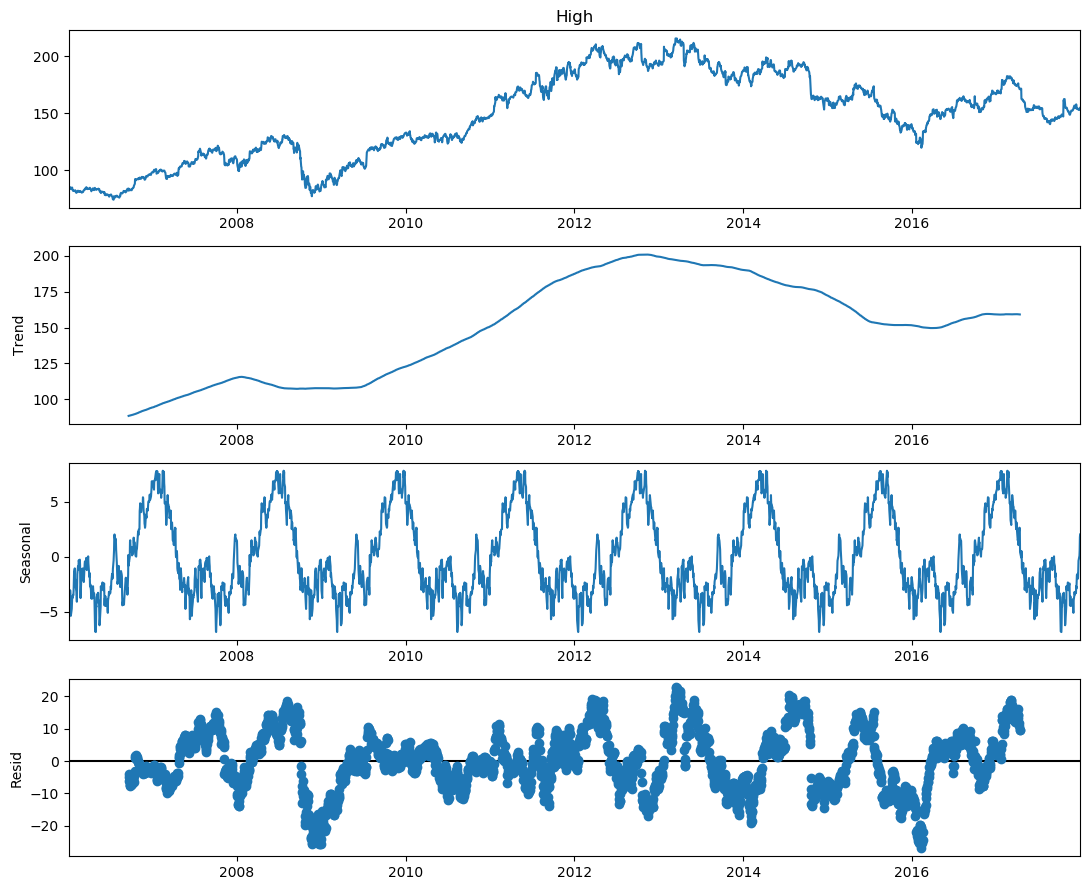

In [44]:
# Set the figure size
rcParams['figure.figsize'] = 11, 9

# Perform seasonal decomposition on the "High" column of the "ibm" DataFrame
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["High"], period=360)  # The frequency is annual

# Plot the decomposition results
figure = decomposed_ibm_volume.plot()

# Display the plot
plt.show()

#### Amazon

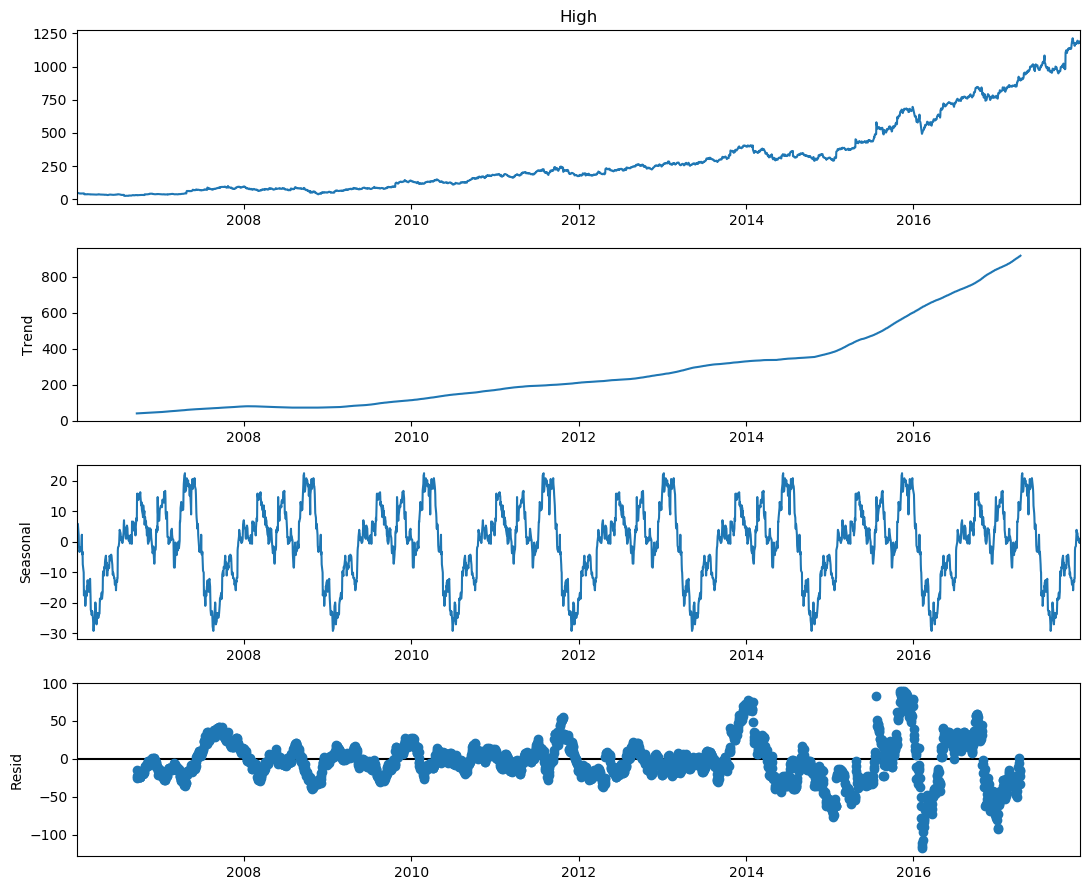

In [45]:
# Set the figure size
rcParams['figure.figsize'] = 11, 9

# Perform seasonal decomposition on the "High" column of the "amazon" DataFrame
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["High"], period=360)  # The frequency is annual

# Plot the decomposition results
figure = decomposed_amazon_volume.plot()

# Display the plot
plt.show()

### Trend and Seasonality (Close)

#### Google

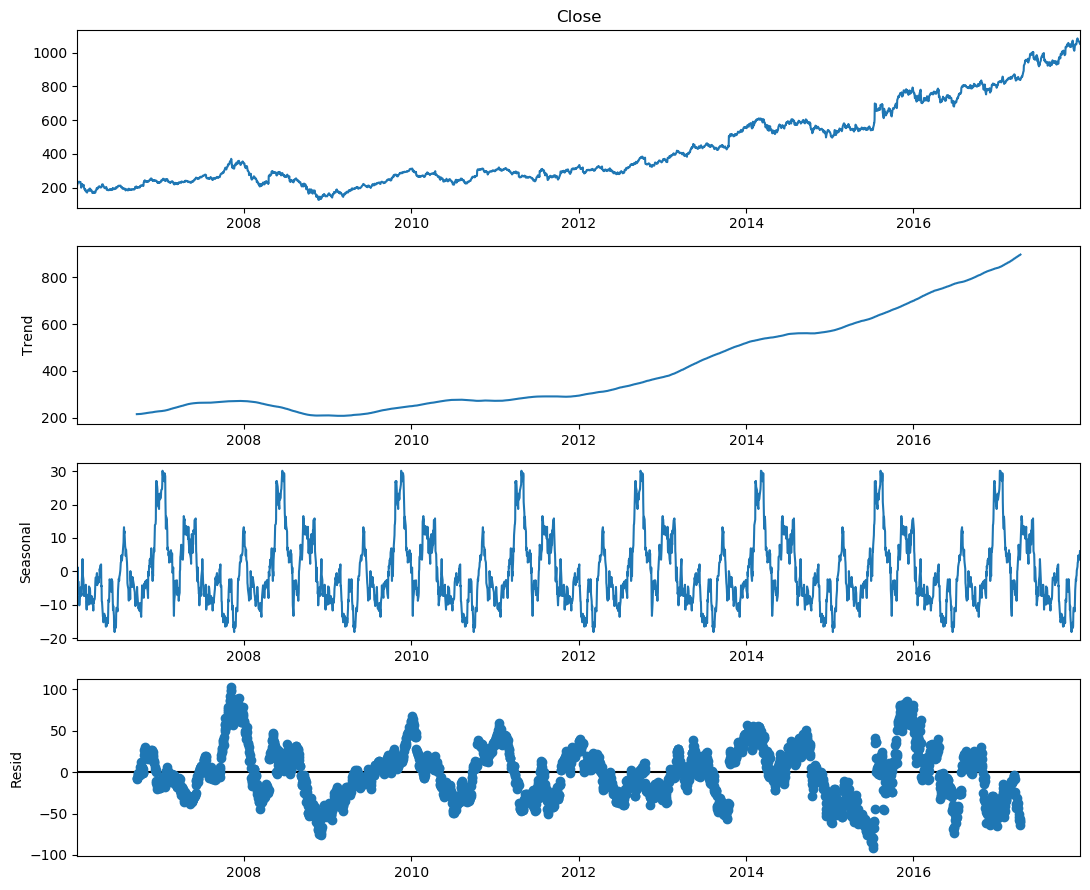

In [46]:
# Set the figure size
rcParams['figure.figsize'] = 11, 9

# Perform seasonal decomposition on the "Close" column of the "google" DataFrame
decomposed_google_volume = sm.tsa.seasonal_decompose(google["Close"], period=360)  # The frequency is annual

# Plot the decomposition results
figure = decomposed_google_volume.plot()

# Display the plot
plt.show()

#### Microsoft

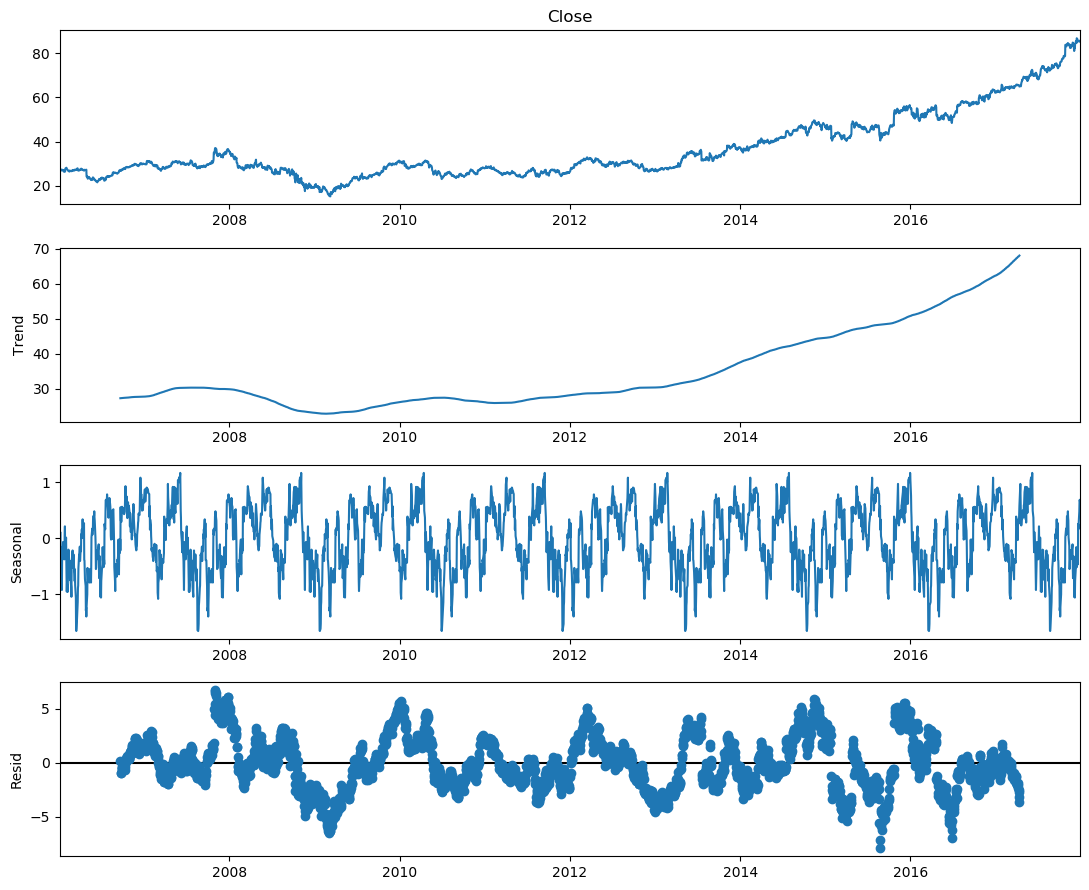

In [47]:
# Set the figure size
rcParams['figure.figsize'] = 11, 9

# Perform seasonal decomposition on the "Close" column of the "microsoft" DataFrame
decomposed_microsoft_volume = sm.tsa.seasonal_decompose(microsoft["Close"], period=360)  # The frequency is annual

# Plot the decomposition results
figure = decomposed_microsoft_volume.plot()

# Display the plot
plt.show()

#### Amazon

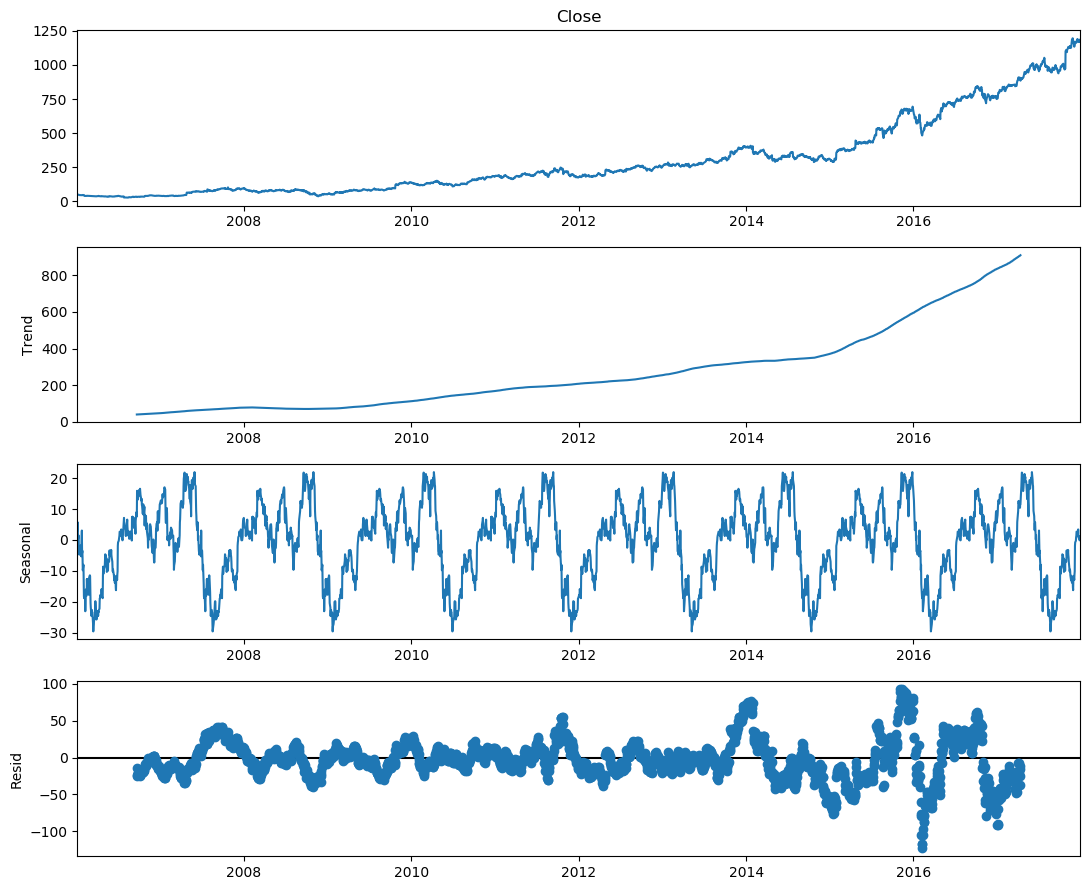

In [49]:
# Set the figure size
rcParams['figure.figsize'] = 11, 9

# Perform seasonal decomposition on the "Close" column of the "amazon" DataFrame
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon["Close"], period=360)  # The frequency is annual

# Plot the decomposition results
figure = decomposed_amazon_volume.plot()

# Display the plot
plt.show()

#### IBM

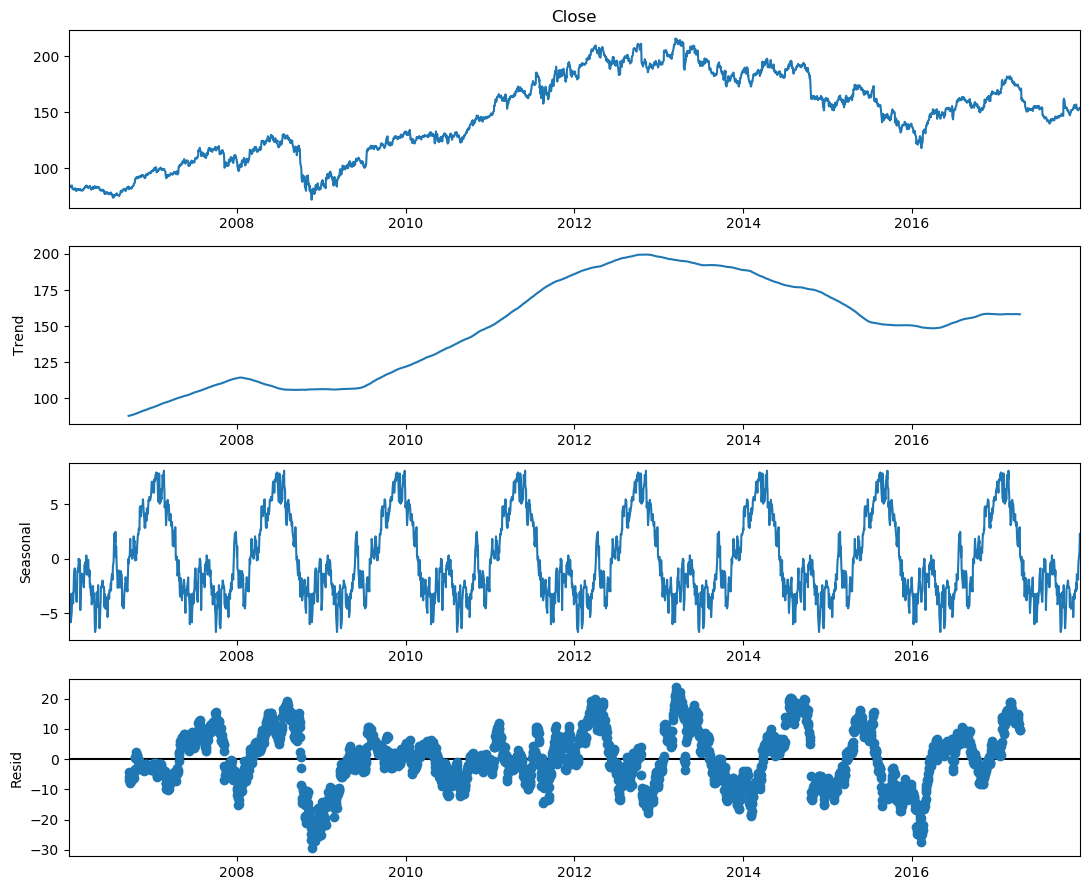

In [51]:
# Set the figure size
rcParams['figure.figsize'] = 11, 9

# Perform seasonal decomposition on the "Close" column of the "ibm" DataFrame
decomposed_ibm_volume = sm.tsa.seasonal_decompose(ibm["Close"], period=360)  # The frequency is annual

# Plot the decomposition results
figure = decomposed_ibm_volume.plot()

# Display the plot
plt.show()

### Additional Data Visualization

In [94]:
filepath = 'amazon.csv'
data_amazon = pd.read_csv(filepath)
data_amazon = data_amazon.sort_values('Date')
data_amazon.head()

Date   Open   High    Low  Close   Volume  Name
0  2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
1  2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2  2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
3  2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
4  2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN

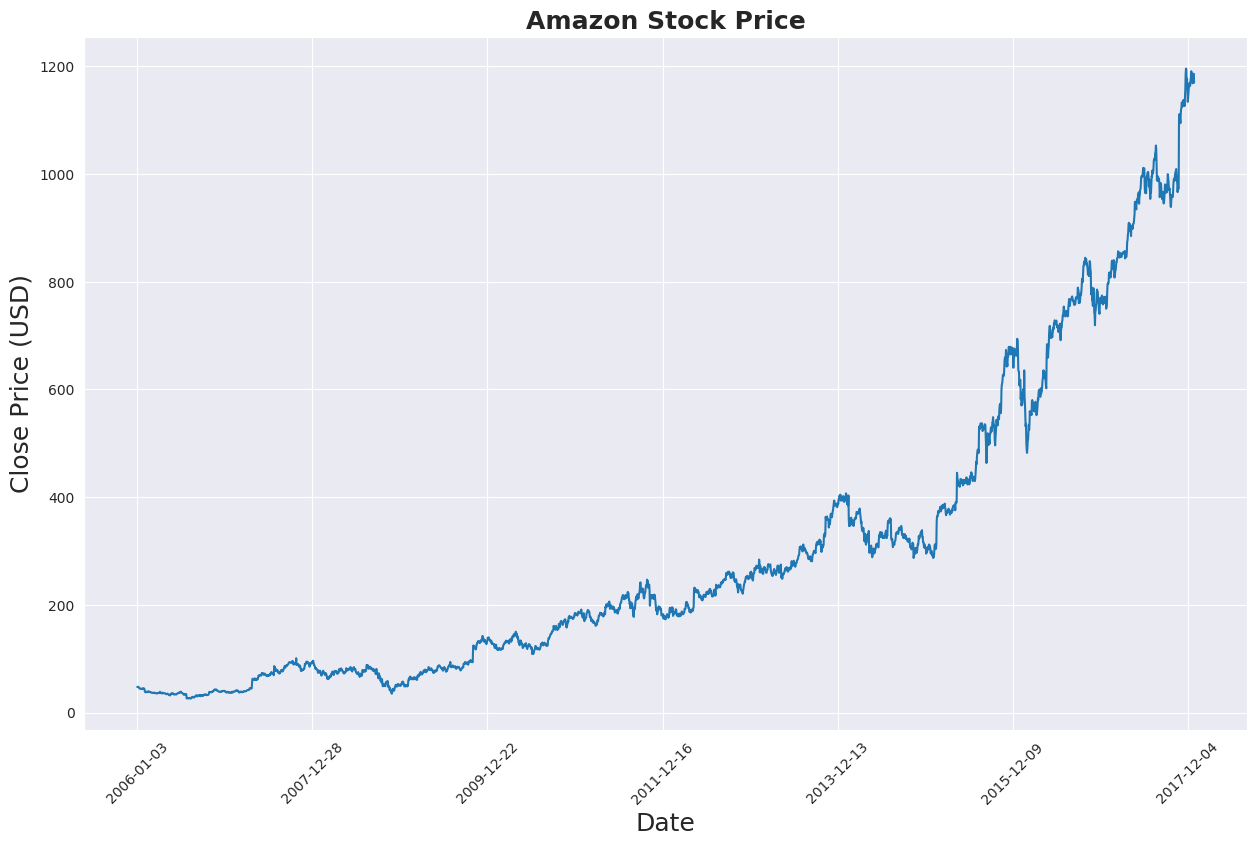

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_amazon[['Close']])
plt.xticks(range(0,data_amazon.shape[0],500),data_amazon['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [97]:
filepath = 'google.csv'
data_google = pd.read_csv(filepath)
data_google = data_google.sort_values('Date')
data_google.head()

Date    Open    High     Low   Close    Volume   Name
0  2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
1  2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2  2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
3  2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
4  2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

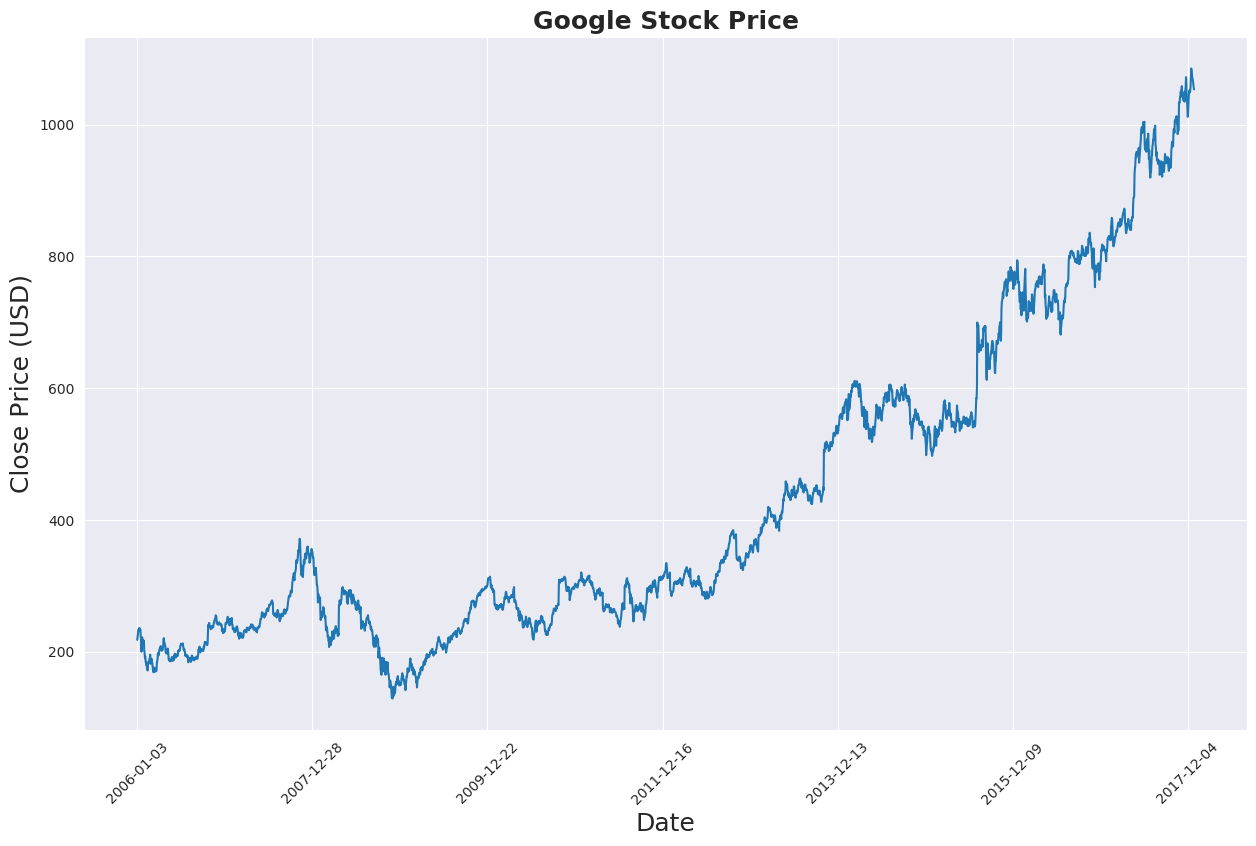

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_google[['Close']])
plt.xticks(range(0,data_google.shape[0],500),data_google['Date'].loc[::500],rotation=45)
plt.title("Google Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [99]:
filepath = 'ibm.csv'
data_ibm = pd.read_csv(filepath)
data_ibm = data_ibm.sort_values('Date')
data_ibm.head()

Date   Open   High    Low  Close    Volume Name
0  2006-01-03  82.45  82.55  80.81  82.06  11715200  IBM
1  2006-01-04  82.20  82.50  81.33  81.95   9840600  IBM
2  2006-01-05  81.40  82.90  81.00  82.50   7213500  IBM
3  2006-01-06  83.95  85.03  83.41  84.95   8197400  IBM
4  2006-01-09  84.10  84.25  83.38  83.73   6858200  IBM

In [100]:
data_ibm.dropna(inplace=True)

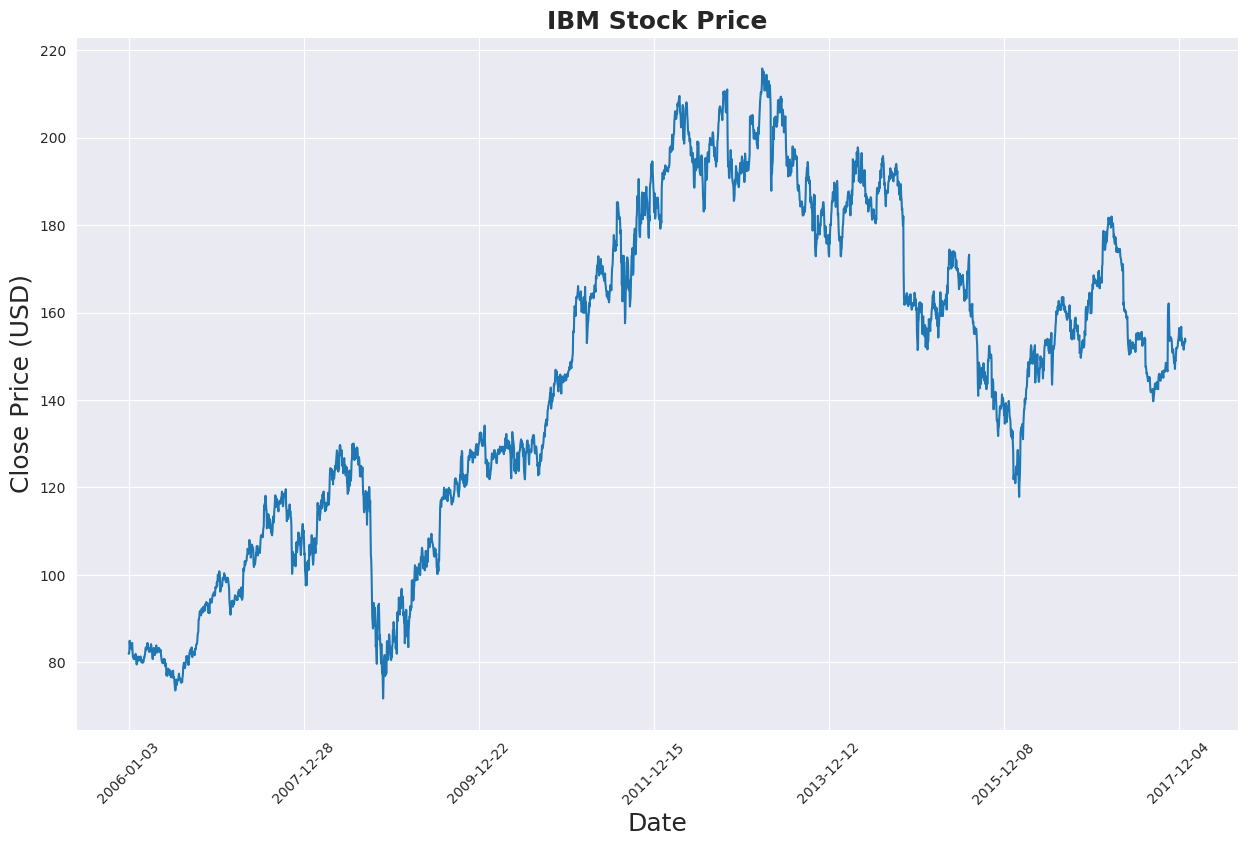

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_ibm[['Close']])
plt.xticks(range(0,data_ibm.shape[0],500),data_ibm['Date'].loc[::500],rotation=45)
plt.title("IBM Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [102]:
filepath = 'microsoft.csv'
data_microsoft = pd.read_csv(filepath)
data_microsoft = data_microsoft.sort_values('Date')
data_microsoft.head()

Date   Open   High    Low  Close     Volume  Name
0  2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
1  2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2  2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
3  2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
4  2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT

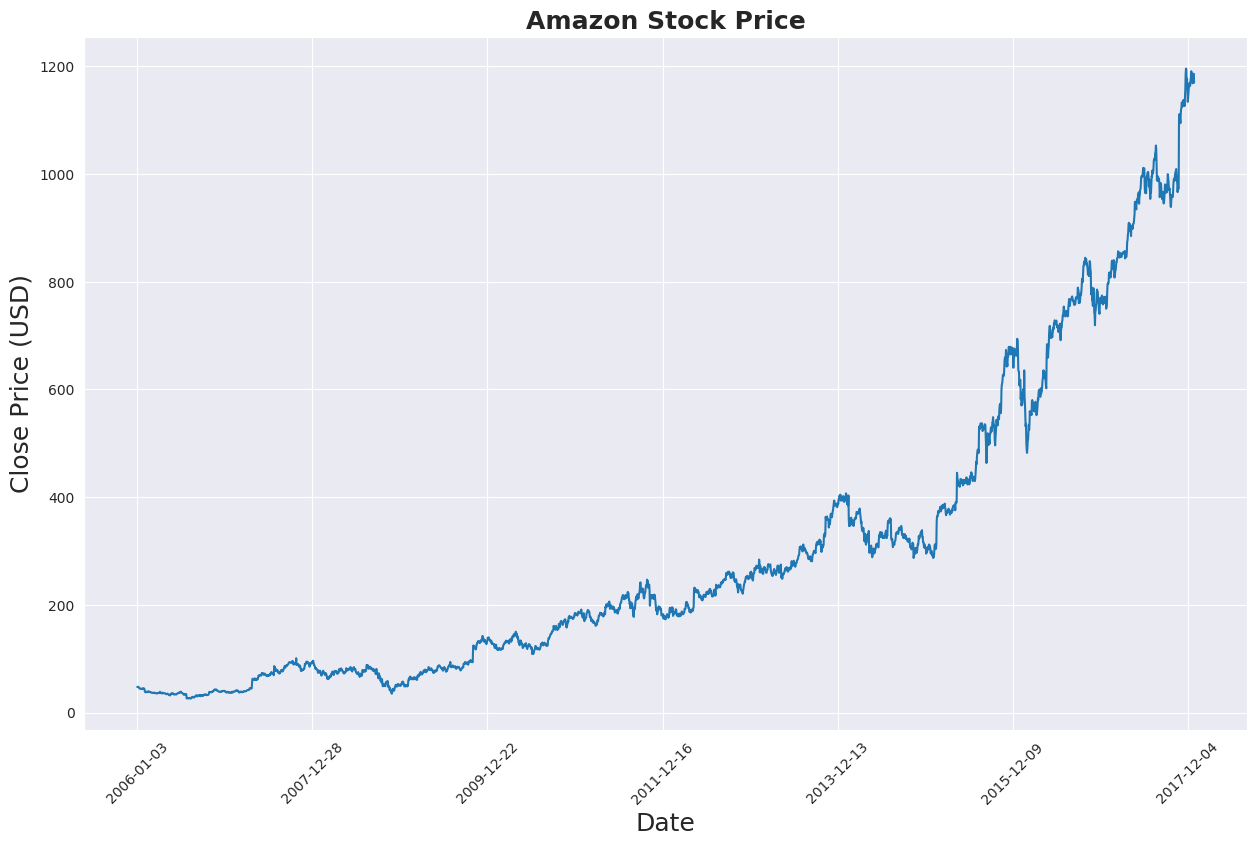

In [103]:
sns.set_style("darkgrid")  # Setting the plot style to darkgrid
plt.figure(figsize=(15, 9))  # Setting the figure size

# Plotting the 'Close' column of the 'data_amazon' DataFrame
plt.plot(data_amazon[['Close']])

# Customizing the x-axis tick labels
plt.xticks(range(0, data_amazon.shape[0], 500), data_amazon['Date'].loc[::500], rotation=45)

# Adding a title, x-axis label, and y-axis label to the plot
plt.title("Amazon Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)

# Display the plot
plt.show()

## Modelling

### Amazon

In [104]:
price_amazon = data_amazon[['Close']]
price_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))

In [106]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy()  # Convert the input stock data to a NumPy array
    data = []  # Create an empty list to store the data
    
    # Loop through the data to create the input sequences
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data)  # Convert the data list to a NumPy array
    test_set_size = int(np.round(0.2 * data.shape[0]))  # Calculate the size of the test set
    train_set_size = data.shape[0] - test_set_size  # Calculate the size of the train set
    
    x_train = data[:train_set_size, :-1, :]  # Get the input sequences for the train set
    y_train = data[:train_set_size, -1, :]  # Get the target values for the train set
    
    x_test = data[train_set_size:, :-1, :]  # Get the input sequences for the test set
    y_test = data[train_set_size:, -1, :]  # Get the target values for the test set
    
    return [x_train, y_train, x_test, y_test]

In [107]:
lookback = 20 
x_train, y_train, x_test, y_test = split_data(price_amazon, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [108]:
import torch
import torch.nn as nn

# Convert the training and test data to torch tensors
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [109]:
input_dim = 1  # Input dimension (number of features)
hidden_dim = 32  # Number of hidden units in each layer
num_layers = 2  # Number of layers in the model
output_dim = 1  # Output dimension (number of predicted values)
num_epochs = 105  # Number of training epochs

In [110]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # Define the GRU layer with the specified input dimension, hidden dimension, and number of layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        
        # Define the fully connected layer that maps the hidden dimension to the output dimension
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        
        # Pass the input sequence through the GRU layer
        out, (hn) = self.gru(x, (h0.detach()))
        
        # Take the last output of the GRU sequence and pass it through the fully connected layer
        out = self.fc(out[:, -1, :]) 
        
        return out

In [111]:
# Create an instance of the GRU model with the specified input dimension, hidden dimension, output dimension, and number of layers
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

# Define the criterion for calculating the loss (mean squared error)
criterion = torch.nn.MSELoss(reduction='mean')

# Define the optimiser for updating the model parameters (Adam optimizer with learning rate of 0.01)
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [112]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.6257650256156921
Epoch  1 MSE:  0.2623752951622009
Epoch  2 MSE:  0.06574790179729462
Epoch  3 MSE:  0.05251208692789078
Epoch  4 MSE:  0.10641971975564957
Epoch  5 MSE:  0.05293264240026474
Epoch  6 MSE:  0.026700997725129128
Epoch  7 MSE:  0.04170955717563629
Epoch  8 MSE:  0.057668287307024
Epoch  9 MSE:  0.05683258920907974
Epoch  10 MSE:  0.043770093470811844
Epoch  11 MSE:  0.029070019721984863
Epoch  12 MSE:  0.022059809416532516
Epoch  13 MSE:  0.026007216423749924
Epoch  14 MSE:  0.03414813056588173
Epoch  15 MSE:  0.035553399473428726
Epoch  16 MSE:  0.02866816706955433
Epoch  17 MSE:  0.021015264093875885
Epoch  18 MSE:  0.018500005826354027
Epoch  19 MSE:  0.02076811157166958
Epoch  20 MSE:  0.02387295663356781
Epoch  21 MSE:  0.024343367666006088
Epoch  22 MSE:  0.021345706656575203
Epoch  23 MSE:  0.016701990738511086
Epoch  24 MSE:  0.013464406132698059
Epoch  25 MSE:  0.013533488847315311
Epoch  26 MSE:  0.015498912893235683
Epoch  27 MSE:  0.0156553555

In [113]:
# Convert the predicted values to a pandas DataFrame and apply inverse transformation to get the original scale
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))

# Convert the original target values to a pandas DataFrame and apply inverse transformation to get the original scale
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

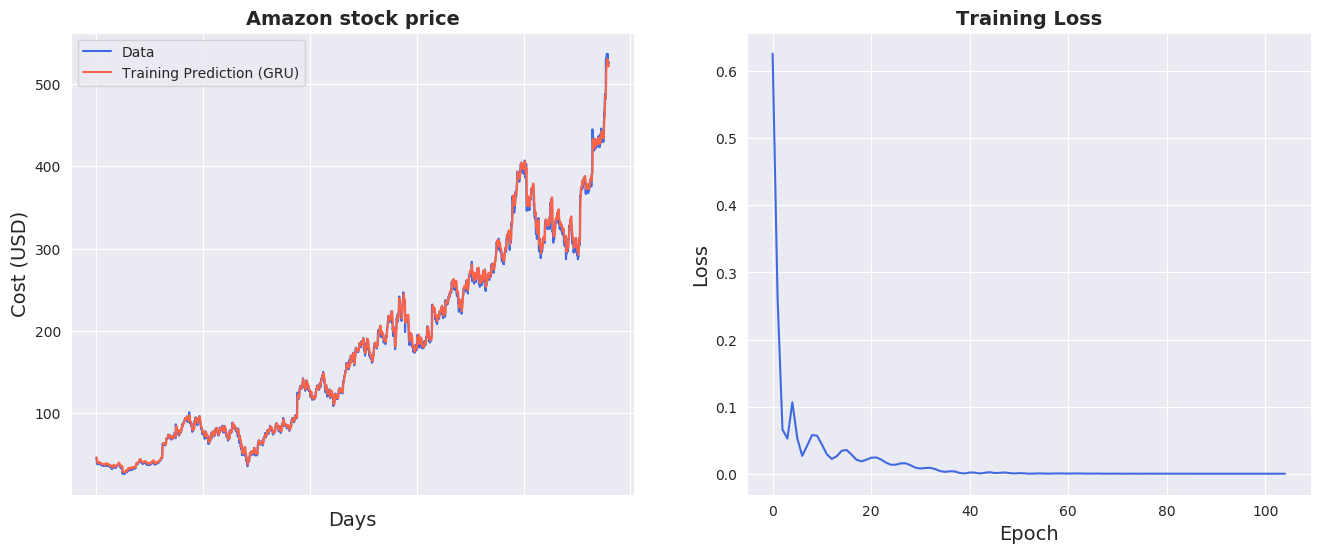

In [114]:
sns.set_style("darkgrid")  # Set the plot style to darkgrid

# Create a figure with subplots
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# First subplot: Plotting the original data and the training predictions
plt.subplot(1, 2, 1)
ax = sns.lineplot(x=original.index, y=original[0], label="Data", color='royalblue')
ax = sns.lineplot(x=predict.index, y=predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Amazon stock price', size=14, fontweight='bold')
ax.set_xlabel("Days", size=14)
ax.set_ylabel("Cost (USD)", size=14)
ax.set_xticklabels('', size=10)

# Second subplot: Plotting the training loss
plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size=14)
ax.set_ylabel("Loss", size=14)
ax.set_title("Training Loss", size=14, fontweight='bold')

# Adjust the figure size
fig.set_figheight(6)
fig.set_figwidth(16)

plt.show()

In [115]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 5.07 RMSE
Test Score: 74.47 RMSE


In [116]:
# Create empty arrays to store the predicted values
trainPredictPlot = np.empty_like(price_amazon)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

testPredictPlot = np.empty_like(price_amazon)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_amazon)-1, :] = y_test_pred

# Convert the original data back to the original scale
original = scaler.inverse_transform(price_amazon['Close'].values.reshape(-1, 1))

# Concatenate the predicted values and the original data
predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)

# Create a DataFrame to store the predictions and original data
result = pd.DataFrame(predictions)

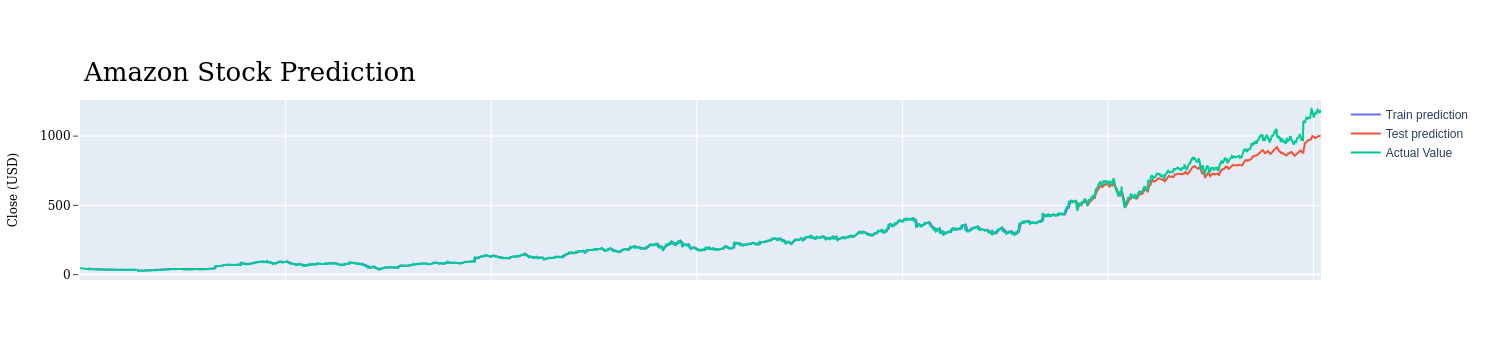

In [120]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
    ),
    showlegend=True,

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Amazon Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

### Google

In [122]:
price_google = data_google[['Close']]
price_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price_google['Close'] = scaler.fit_transform(price_google['Close'].values.reshape(-1,1))

In [126]:
lookback = 20
x_train, y_train, x_test, y_test = split_data(price_google, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [127]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [128]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [129]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.38167399168014526
Epoch  1 MSE:  0.15675246715545654
Epoch  2 MSE:  0.06345605105161667
Epoch  3 MSE:  0.1087782233953476
Epoch  4 MSE:  0.08612079918384552
Epoch  5 MSE:  0.05082327872514725
Epoch  6 MSE:  0.0480986163020134
Epoch  7 MSE:  0.05742626637220383
Epoch  8 MSE:  0.056410618126392365
Epoch  9 MSE:  0.04207386076450348
Epoch  10 MSE:  0.02562171034514904
Epoch  11 MSE:  0.022200725972652435
Epoch  12 MSE:  0.030475979670882225
Epoch  13 MSE:  0.023997800424695015
Epoch  14 MSE:  0.007232707925140858
Epoch  15 MSE:  0.004200266674160957
Epoch  16 MSE:  0.013781038112938404
Epoch  17 MSE:  0.012253989465534687
Epoch  18 MSE:  0.003028277773410082
Epoch  19 MSE:  0.006036663427948952
Epoch  20 MSE:  0.011069528758525848
Epoch  21 MSE:  0.005029323045164347
Epoch  22 MSE:  0.0004372046096250415
Epoch  23 MSE:  0.0025622029788792133
Epoch  24 MSE:  0.005623912904411554
Epoch  25 MSE:  0.00541336415335536
Epoch  26 MSE:  0.0028902990743517876
Epoch  27 MSE:  0.001

In [130]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

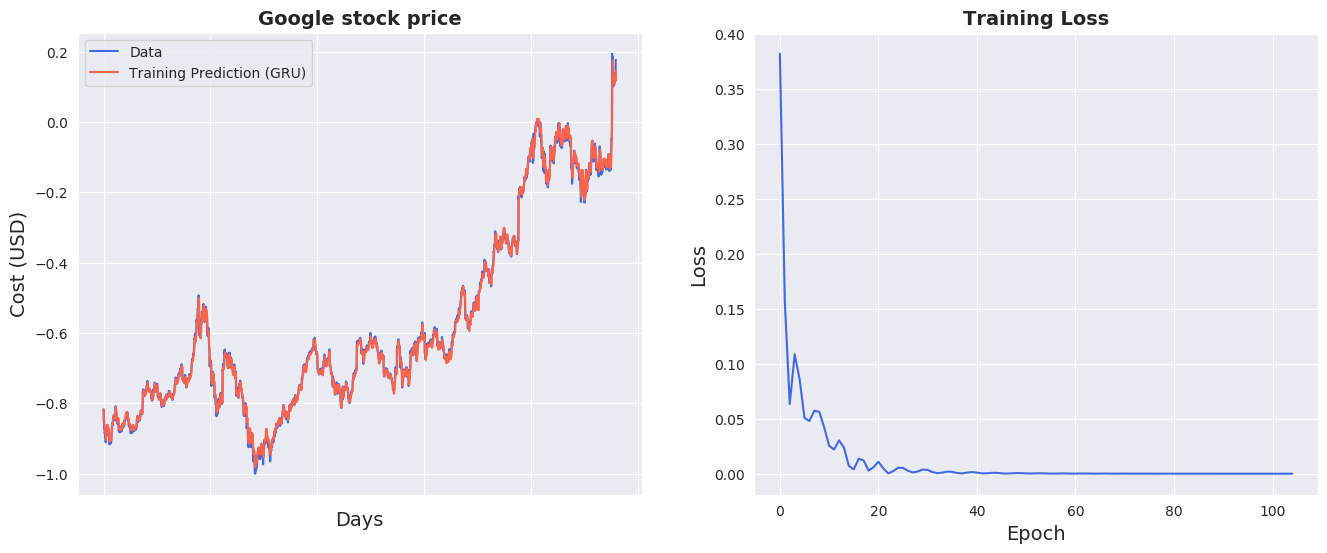

In [134]:
sns.set_style("darkgrid")  # Set the plot style to darkgrid

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x=original.index, y=original[0], label="Data", color='royalblue')
ax = sns.lineplot(x=predict.index, y=predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Google stock price', size=14, fontweight='bold')
ax.set_xlabel("Days", size=14)
ax.set_ylabel("Cost (USD)", size=14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size=14)
ax.set_ylabel("Loss", size=14)
ax.set_title("Training Loss", size=14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

plt.show()

In [135]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 0.01 RMSE
Test Score: 0.08 RMSE


In [136]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_google)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_google)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_google)-1, :] = y_test_pred

original = scaler.inverse_transform(price_google['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

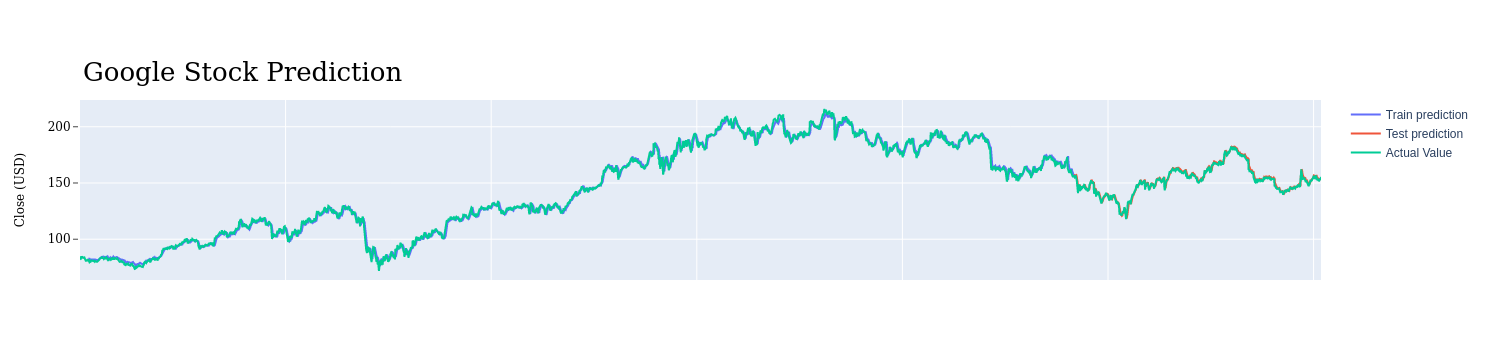

In [157]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
    ),
    showlegend=True,

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Google Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

### IBM

In [138]:
price_ibm = data_ibm[['Close']]
price_ibm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price_ibm['Close'] = scaler.fit_transform(price_ibm['Close'].values.reshape(-1,1))

In [140]:
lookback = 20
x_train, y_train, x_test, y_test = split_data(price_ibm, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [141]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [142]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [143]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [144]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.3470839560031891
Epoch  1 MSE:  0.2634274661540985
Epoch  2 MSE:  0.18677735328674316
Epoch  3 MSE:  0.0912029817700386
Epoch  4 MSE:  0.004849510733038187
Epoch  5 MSE:  0.12549187242984772
Epoch  6 MSE:  0.04979394003748894
Epoch  7 MSE:  0.0028725918382406235
Epoch  8 MSE:  0.01394759863615036
Epoch  9 MSE:  0.03464451804757118
Epoch  10 MSE:  0.04479413479566574
Epoch  11 MSE:  0.04288157820701599
Epoch  12 MSE:  0.032156769186258316
Epoch  13 MSE:  0.01756141148507595
Epoch  14 MSE:  0.005371700506657362
Epoch  15 MSE:  0.0020245895721018314
Epoch  16 MSE:  0.009388137608766556
Epoch  17 MSE:  0.01856190338730812
Epoch  18 MSE:  0.018699660897254944
Epoch  19 MSE:  0.011093023233115673
Epoch  20 MSE:  0.003915182314813137
Epoch  21 MSE:  0.0016633359482511878
Epoch  22 MSE:  0.003519538789987564
Epoch  23 MSE:  0.006693694740533829
Epoch  24 MSE:  0.008918724954128265
Epoch  25 MSE:  0.009164543822407722
Epoch  26 MSE:  0.007545168045908213
Epoch  27 MSE:  0.00492

In [145]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

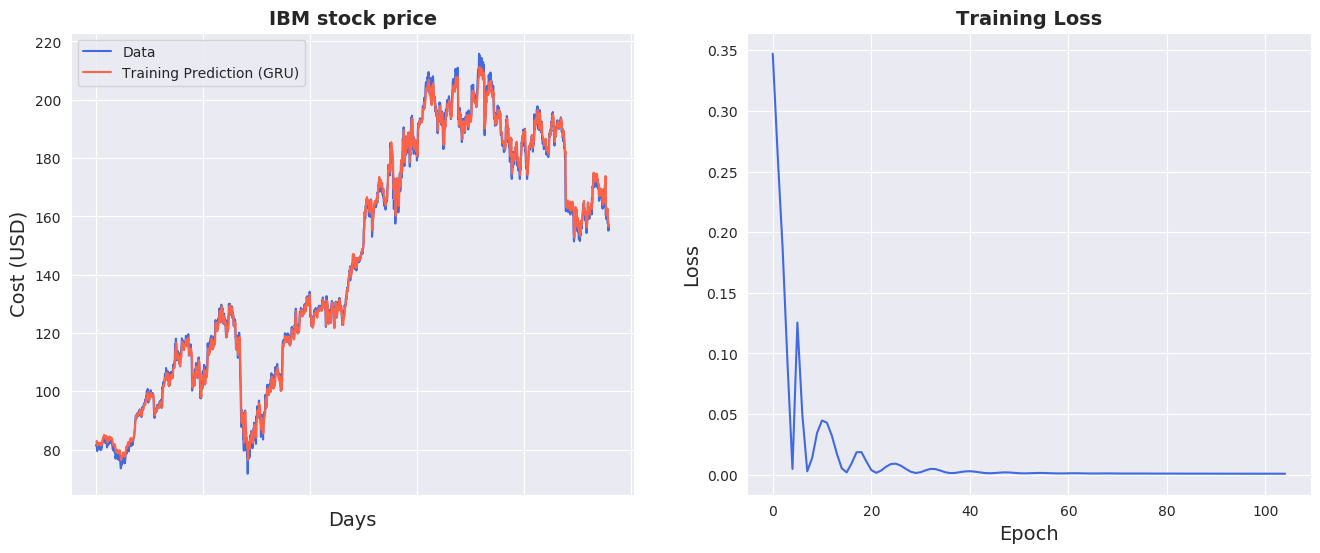

In [148]:
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('IBM stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

plt.show()

In [149]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 2.17 RMSE
Test Score: 2.04 RMSE


In [150]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_ibm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_ibm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_ibm)-1, :] = y_test_pred

original = scaler.inverse_transform(price_ibm['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

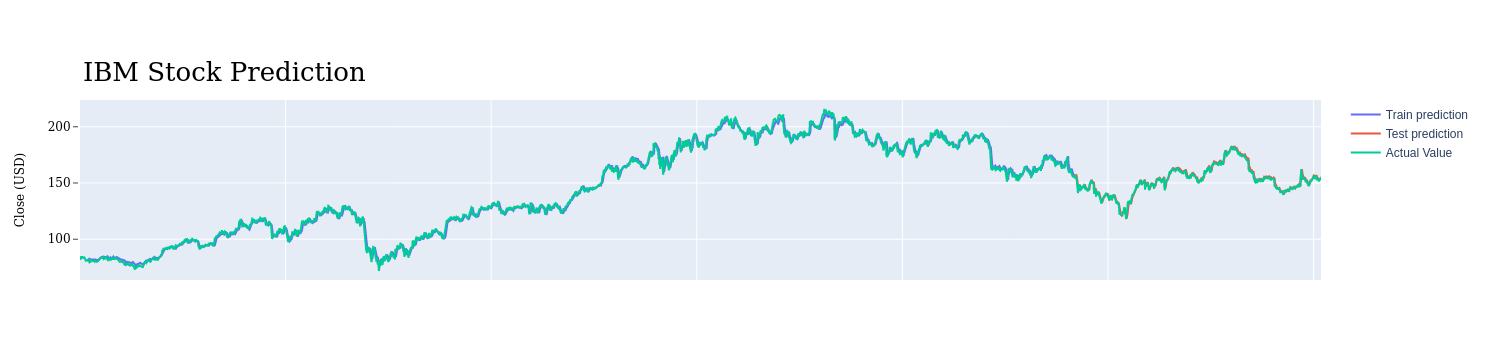

In [151]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
    ),
    showlegend=True,

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='IBM Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

### Microsoft

In [158]:
price_microsoft = data_microsoft[['Close']]
price_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price_microsoft['Close'] = scaler.fit_transform(price_microsoft['Close'].values.reshape(-1,1))

In [160]:
lookback = 20
x_train, y_train, x_test, y_test = split_data(price_microsoft, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [161]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [162]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [163]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [164]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.5441157221794128
Epoch  1 MSE:  0.24732717871665955
Epoch  2 MSE:  0.07241109758615494
Epoch  3 MSE:  0.05935698375105858
Epoch  4 MSE:  0.097722627222538
Epoch  5 MSE:  0.04611711576581001
Epoch  6 MSE:  0.031217509880661964
Epoch  7 MSE:  0.049063216894865036
Epoch  8 MSE:  0.06005164980888367
Epoch  9 MSE:  0.05305885896086693
Epoch  10 MSE:  0.036544572561979294
Epoch  11 MSE:  0.023959225043654442
Epoch  12 MSE:  0.024640975520014763
Epoch  13 MSE:  0.03413841873407364
Epoch  14 MSE:  0.03676548972725868
Epoch  15 MSE:  0.028331303969025612
Epoch  16 MSE:  0.018930654972791672
Epoch  17 MSE:  0.01629996858537197
Epoch  18 MSE:  0.019226258620619774
Epoch  19 MSE:  0.02217760495841503
Epoch  20 MSE:  0.021142005920410156
Epoch  21 MSE:  0.01608721725642681
Epoch  22 MSE:  0.010385703295469284
Epoch  23 MSE:  0.008147585205733776
Epoch  24 MSE:  0.010029558092355728
Epoch  25 MSE:  0.011305120773613453
Epoch  26 MSE:  0.008004205301404
Epoch  27 MSE:  0.003231184557

In [165]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

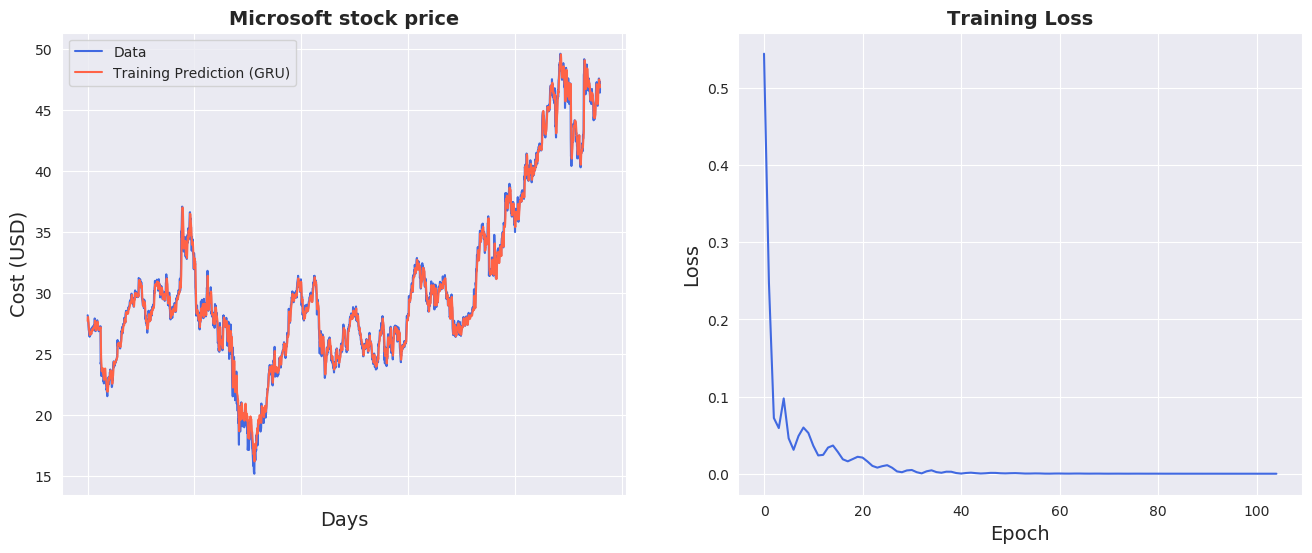

In [166]:
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Microsoft stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

plt.show()

In [167]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 0.57 RMSE
Test Score: 2.25 RMSE


In [168]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_microsoft)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_microsoft)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_microsoft)-1, :] = y_test_pred

original = scaler.inverse_transform(price_microsoft['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

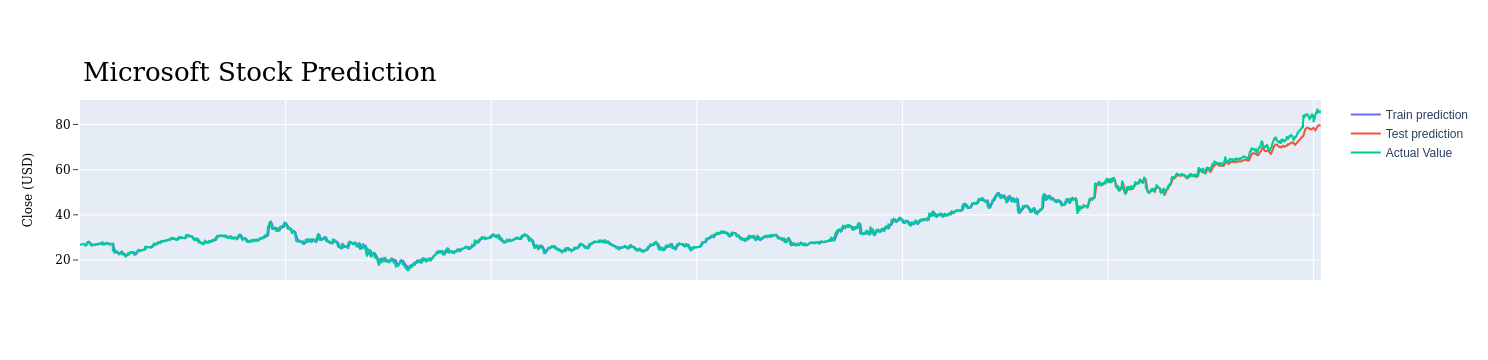

In [170]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='black',
        ),
    ),
    showlegend=True,

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Microsoft Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()